# Import Libraries

In [ ]:
import tensorflow
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt

# tensorflow libraries
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

# sklearn libraries are useful for preprocessing, performance measures, etc.
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# Read Data

In [ ]:
df = pd.read_csv('./features_30_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,0.083045,0.000767,-4.529724e-05,0.008172,0.000008,0.005698,123.046875,-113.570648,2564.207520,121.571793,295.913818,-19.168142,235.574432,42.366421,151.106873,-6.364664,167.934799,18.623499,89.180840,-13.704891,67.660492,15.343150,68.932579,-12.274110,82.204201,10.976572,63.386311,-8.326573,61.773094,8.803792,51.244125,-3.672300,41.217415,5.747995,40.554478,-5.162882,49.775421,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,0.056040,0.001448,1.395807e-04,0.005099,-0.000178,0.003063,67.999589,-207.501694,7764.555176,123.991264,560.259949,8.955127,572.810913,35.877647,264.506104,2.907320,279.932922,21.510466,156.477097,-8.560436,200.849182,23.370686,142.555954,-10.099661,166.108521,11.900497,104.358612,-5.555639,105.173630,5.376327,96.197212,-2.231760,64.914291,4.220140,73.152534,-6.012148,52.422142,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,0.076291,0.001007,2.105576e-06,0.016342,-0.000019,0.007458,161.499023,-90.722595,3319.044922,140.446304,508.765045,-29.093889,411.781219,31.684334,144.090317,-13.984504,155.493759,25.764742,74.548401,-13.664875,106.981827,11.639934,106.574875,-11.783643,65.447945,9.718760,67.908859,-13.133803,57.781425,5.791199,64.480209,-8.907628,60.385151,-1.077000,57.711136,-9.229274,36.580986,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,0.033309,0.000423,4.583644e-07,0.019054,-0.000014,0.002712,63.024009,-199.544205,5507.517090,150.090897,456.505402,5.662678,257.161163,26.859079,158.267303,1.771399,268.034393,14.234031,126.794128,-4.832006,155.912079,9.286494,81.273743,-0.759186,92.114090,8.137607,71.314079,-3.200653,110.236687,6.079319,48.251999,-2.480174,56.799400,-1.079305,62.289902,-2.870789,51.651592,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,0.101461,0.001954,-1.756129e-05,0.004814,-0.000010,0.003094,135.999178,-160.337708,5195.291992,126.219635,853.784729,-35.587811,333.792938,22.148071,193.456100,-32.478600,336.276825,10.852294,134.831573,-23.352329,93.257095,0.498434,124.672127,-11.793437,130.073349,1.207256,99.675575,-13.088418,80.254066,-2.813867,86.430626,-6.933385,89.555443,-7.552725,70.943336,-9.164666,75.793404,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [ ]:
df['label'].value_counts()

country      100
rock         100
hiphop       100
classical    100
metal        100
blues        100
disco        100
jazz         100
pop          100
reggae       100
Name: label, dtype: int64

Split and scale dataset

In [ ]:
columns_to_drop = ['label', 'filename', 'length']


def prepare_dataset(df, columns_to_drop, test_size, random_state):
    # Encode the labels from 0 to n_classes-1
    label_encoder = preprocessing.LabelEncoder()
    df['label'] = label_encoder.fit_transform(df['label'])

    # devide data to train and test
    df_train, df_test = train_test_split(df, test_size=test_size, random_state=random_state)

    # scale the training inputs
    x_train = df_train.drop(columns_to_drop, axis=1)
    y_train = df_train['label'].to_numpy()

    standard_scaler = preprocessing.StandardScaler()
    x_train_scaled = standard_scaler.fit_transform(x_train)

    #scale and prepare testing data
    x_test = df_test.drop(columns_to_drop, axis=1)
    x_test_scaled = standard_scaler.transform(x_test)
    y_test = df_test['label'].to_numpy()

    return x_train_scaled, y_train, x_test_scaled, y_test

In [ ]:
X_train, y_train, X_test, y_test = prepare_dataset(df, columns_to_drop, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(700, 57) (700,)
(300, 57) (300,)


# Question 1

Design a feedforward deep neural network (DNN) which consists of an input layer, one hidden layer of 16 neurons with ReLU activation function, and an output softmax layer. Use an stochastic gradient descent with ‘adam’ optimizer with default parameters, and batch size = 1. Apply dropout of probability 0.3 to the hidden layer. Divide the dataset into a 70:30 ratio for training and testing. Use appropriate scaling of input features. We solely assume that there are only two datasets here: training & test. We would look into validation in Question 2 onwards.

In [ ]:
class Question1():

    def __init__(self, X_train, y_train, X_test, y_test, epochs=50, num_hidden_neurons=16, batch_size=1):
        self.epochs = epochs
        self.num_hidden_neurons = num_hidden_neurons
        self.batch_size = batch_size
        self.seed = 0
        self.history = None

        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test

        np.random.seed(self.seed)
        tf.random.set_seed(self.seed)

    def create_model(self, num_hidden_neurons=None):
        # create the model
        num_hidden_neurons = num_hidden_neurons or self.num_hidden_neurons
        self.model = tf.keras.Sequential([
            tf.keras.layers.Dense(units=num_hidden_neurons, activation="relu"),
            tf.keras.layers.Dropout(rate=0.3, seed=self.seed),
            tf.keras.layers.Dense(units=10, activation="softmax")
        ])

        self.model.compile(optimizer="adam",
                           loss="sparse_categorical_crossentropy",
                           metrics=["accuracy"])

    def summarize_model(self):
        # summarize the model
        print(self.model.summary())

    def train_model(self, batch_size=None):
        # train the model
        batch_size = batch_size or self.batch_size
        self.history = self.model.fit(x=self.X_train, y=self.y_train,
                                      batch_size=batch_size,
                                      epochs=self.epochs,
                                      verbose=1,
                                      validation_data=(self.X_test, self.y_test))

    def plot_model(self, variable="loss", epoch_start=1, epoch_end=None):
        # plot learning curves
        train_epochs = self.history.history[variable][epoch_start - 1:epoch_end]
        val_epochs = self.history.history["val_{}".format(variable)][epoch_start - 1:epoch_end]
        number_epochs = len(self.history.history[variable][epoch_start - 1:epoch_end])

        plt.plot(range(epoch_start, epoch_start + number_epochs), train_epochs,
                 label="Model training {}".format(variable))
        plt.plot(range(epoch_start, epoch_start + number_epochs), val_epochs, label="Model test {}".format(variable))
        plt.title("Model {}".format(variable))
        plt.ylabel("{}".format(variable))
        plt.xlabel("epoch")
        plt.legend(loc="best")
        plt.show()

a) Use the training dataset to train the model for 50 epochs. Note: Use 50 epochs for subsequent experiments.

In [ ]:
question1 = Question1(X_train, y_train, X_test, y_test)
question1.create_model()
question1.train_model()

Epoch 1/50
700/700 [==============================] - 2s 2ms/step - loss: 2.1328 - accuracy: 0.2600 - val_loss: 1.8476 - val_accuracy: 0.3600
Epoch 2/50
700/700 [==============================] - 1s 2ms/step - loss: 1.7141 - accuracy: 0.3814 - val_loss: 1.6001 - val_accuracy: 0.4300
Epoch 3/50
700/700 [==============================] - 1s 2ms/step - loss: 1.4697 - accuracy: 0.4429 - val_loss: 1.4565 - val_accuracy: 0.4600
Epoch 4/50
700/700 [==============================] - 1s 2ms/step - loss: 1.3955 - accuracy: 0.4700 - val_loss: 1.3453 - val_accuracy: 0.4967
Epoch 5/50
700/700 [==============================] - 1s 2ms/step - loss: 1.2862 - accuracy: 0.5200 - val_loss: 1.2631 - val_accuracy: 0.5433
Epoch 6/50
700/700 [==============================] - 1s 2ms/step - loss: 1.2021 - accuracy: 0.5714 - val_loss: 1.2389 - val_accuracy: 0.5633
Epoch 7/50
700/700 [==============================] - 1s 2ms/step - loss: 1.1649 - accuracy: 0.5557 - val_loss: 1.1858 - val_accuracy: 0.5700
Epoch 

b) Plot accuracies on training and test data against training epochs and
comment on the plots.

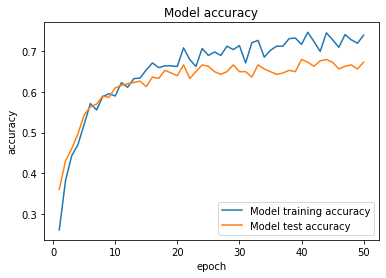

In [ ]:
question1.plot_model("accuracy")

c) Plot the losses on training and test data against training epochs. State the approximate number of epochs where the test error begins to converge.

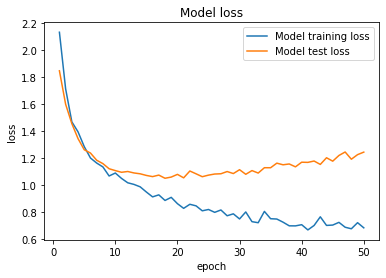

In [ ]:
question1.plot_model("loss")

# Question 2

In this question, we will compare the performance of the model using stochastic gradient descent and mini-batch gradient descent, as well as determining the optimal batch size for mini-batch gradient descent. Find the optimal batch size for mini-batch gradient descent by training the neural network and evaluating the performances for different batch sizes. Note: Use 3-fold cross-validation on training partition to perform parameter selection.

In [ ]:
class TimeTakenPerEpochCallback(tf.keras.callbacks.Callback):

    def __init__(self):
        self.times = []

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_begin_time = time.time()

    def on_epoch_end(self, epoch, logs=None):
        self.times.append(time.time() - self.epoch_begin_time)


class Question2():

    def __init__(self, X_train, y_train, X_test, y_test, epochs=50, num_hidden_neurons=16, batch_size=1,
                 num_experiments=10):
        self.epochs = epochs
        self.num_hidden_neurons = num_hidden_neurons
        self.batch_size = batch_size
        self.num_experiments = num_experiments
        self.batch_sizes = [1, 4, 8, 16, 32, 64]
        self.num_folds = 3
        self.seed = 0
        self.history = None

        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test

        np.random.seed(self.seed)
        tf.random.set_seed(self.seed)

    def create_model(self, num_hidden_neurons=None):
        # create the model
        num_hidden_neurons = num_hidden_neurons or self.num_hidden_neurons
        self.model = tf.keras.Sequential([
            tf.keras.layers.Dense(units=num_hidden_neurons, activation="relu"),
            tf.keras.layers.Dropout(rate=0.3, seed=self.seed),
            tf.keras.layers.Dense(units=10, activation="softmax")
        ])

        self.model.compile(optimizer="adam",
                           loss="sparse_categorical_crossentropy",
                           metrics=["accuracy"])

    def cross_validate_run_experiment(self, experiment_X_train, experiment_y_train):
        size_fold = len(experiment_X_train) // self.num_folds
        # experiment_accuracy maps batch_size_key -> num_fold_key -> epoch_key -> val_accuracy
        experiment_accuracy = {}
        # experiment_time maps batch_size_key -> num_fold_key -> time_taken_list
        experiment_time = {}

        for num_fold in range(self.num_folds):
            start, end = num_fold * size_fold, (num_fold + 1) * size_fold
            cv_X_train = np.append(experiment_X_train[:start], experiment_X_train[end:], axis=0)
            cv_y_train = np.append(experiment_y_train[:start], experiment_y_train[end:], axis=0)
            cv_X_test, cv_y_test = experiment_X_train[start:end], experiment_y_train[start:end]

            for batch_size in self.batch_sizes:

                cv_model = tf.keras.Sequential([
                    tf.keras.layers.Dense(units=self.num_hidden_neurons, activation="relu"),
                    tf.keras.layers.Dropout(rate=0.3, seed=self.seed),
                    tf.keras.layers.Dense(units=10, activation="softmax")
                ])

                cv_model.compile(optimizer="adam",
                                 loss="sparse_categorical_crossentropy",
                                 metrics=["accuracy"])

                callback = TimeTakenPerEpochCallback()

                cv_history = cv_model.fit(x=cv_X_train, y=cv_y_train,
                                          batch_size=batch_size,
                                          epochs=self.epochs,
                                          verbose=0,
                                          callbacks=[callback],
                                          validation_data=(cv_X_test, cv_y_test))

                batch_size_key = "batch_size: {}".format(batch_size)
                num_fold_key = "num_fold: {}".format(num_fold)

                # populate experiment_result
                if not experiment_accuracy.get(batch_size_key):
                    experiment_accuracy[batch_size_key] = {}
                if not experiment_accuracy[batch_size_key].get(num_fold_key):
                    experiment_accuracy[batch_size_key][num_fold_key] = {}

                for epoch, val_accuracy in enumerate(cv_history.history["val_accuracy"]):
                    epoch_key = "epoch: {}".format(epoch)
                    experiment_accuracy[batch_size_key][num_fold_key][epoch_key] = val_accuracy

                # populate experiment_time
                if not experiment_time.get(batch_size_key):
                    experiment_time[batch_size_key] = {}

                experiment_time[batch_size_key][num_fold_key] = callback.times

        return (experiment_accuracy, experiment_time)

    def cross_validate_model(self):
        size_X_train = len(self.X_train)
        index = np.arange(size_X_train)
        # experiment_accuracies maps experiment_key -> batch_size_key -> num_fold_key -> epoch_key -> val_accuracy
        experiment_accuracies = {}
        # experiment_times maps experiment_key -> batch_size_key -> num_fold_key -> time_taken_per_epoch_list
        experiment_times = {}

        for experiment in range(self.num_experiments):
            np.random.shuffle(index)
            experiment_X_train, experiment_y_train = self.X_train[index], self.y_train[index]
            experiment_accuracy, experiment_time = self.cross_validate_run_experiment(experiment_X_train,
                                                                                      experiment_y_train)
            experiment_key = "experiment: {}".format(experiment)
            experiment_accuracies[experiment_key] = experiment_accuracy
            experiment_times[experiment_key] = experiment_time

        experiment_mean_accuracies = self.cross_validate_get_experiment_mean_accuracies(experiment_accuracies)
        self.mean_of_experiment_mean_accuracies = self.cross_validate_get_mean_of_experiment_mean_accuracies(
            experiment_mean_accuracies)

        self.experiment_median_times = self.cross_validate_get_median_of_experiment_times(experiment_times)

    def get_mean_of_experiment_mean_accuracies(self):
        return self.mean_of_experiment_mean_accuracies

    def get_experiment_median_times(self):
        return self.experiment_median_times

    @staticmethod
    def cross_validate_get_experiment_mean_accuracies(experiment_accuracies):
        # experiment_mean_accuracies maps experiment_key -> batch_size_key -> epoch -> mean_val_accuracy
        experiment_mean_accuracies = {}

        for experiment_key in experiment_accuracies.keys():
            # experiment_accuracy maps batch_size_key -> num_fold_key -> epoch_key -> val_accuracy
            experiment_accuracy = experiment_accuracies[experiment_key]
            # experiment_mean_accuracy maps batch_size_key -> epoch_key -> mean_val_accuracy
            experiment_mean_accuracy = {}

            for batch_size_key in experiment_accuracy.keys():
                if not experiment_mean_accuracy.get(batch_size_key):
                    experiment_mean_accuracy[batch_size_key] = {}
                for num_fold_key in experiment_accuracy[batch_size_key].keys():
                    for epoch_key, val_accuracy in experiment_accuracy[batch_size_key][num_fold_key].items():
                        if not experiment_mean_accuracy[batch_size_key].get(epoch_key):
                            experiment_mean_accuracy[batch_size_key][epoch_key] = []
                        experiment_mean_accuracy[batch_size_key][epoch_key].append(val_accuracy)

            for batch_size_key in experiment_mean_accuracy.keys():
                for epoch_key in experiment_mean_accuracy[batch_size_key].keys():
                    experiment_mean_accuracy[batch_size_key][epoch_key] = np.mean(
                        experiment_mean_accuracy[batch_size_key][epoch_key])

            experiment_mean_accuracies[experiment_key] = experiment_mean_accuracy

        return experiment_mean_accuracies

    @staticmethod
    def cross_validate_get_mean_of_experiment_mean_accuracies(experiment_mean_accuracies):
        # mean_of_experiment_mean_accuracies maps batch_size_key -> epoch -> mean_of_mean_val_accuracy
        mean_of_experiment_mean_accuracies = {}

        for experiment_key in experiment_mean_accuracies.keys():
            # experiment_mean_accuracy maps batch_size_key -> epoch_key -> mean_val_accuracy
            experiment_mean_accuracy = experiment_mean_accuracies[experiment_key]

            for batch_size_key in experiment_mean_accuracy.keys():
                if not mean_of_experiment_mean_accuracies.get(batch_size_key):
                    mean_of_experiment_mean_accuracies[batch_size_key] = {}
                for epoch_key, mean_val_accuracy in experiment_mean_accuracy[batch_size_key].items():
                    if not mean_of_experiment_mean_accuracies[batch_size_key].get(epoch_key):
                        mean_of_experiment_mean_accuracies[batch_size_key][epoch_key] = []
                    mean_of_experiment_mean_accuracies[batch_size_key][epoch_key].append(mean_val_accuracy)

        for batch_size_key in mean_of_experiment_mean_accuracies.keys():
            for epoch_key in experiment_mean_accuracy[batch_size_key].keys():
                mean_of_experiment_mean_accuracies[batch_size_key][epoch_key] = np.mean(
                    mean_of_experiment_mean_accuracies[batch_size_key][epoch_key])

        return mean_of_experiment_mean_accuracies

    @staticmethod
    def cross_validate_get_median_of_experiment_times(experiment_times):
        # experiment_median_times maps batch_size_key -> median_time_taken_per_epoch
        experiment_median_times = {}

        for experiment_key in experiment_times.keys():
            # experiment_time maps batch_size_key -> num_fold_key -> time_taken_per_epoch_list
            experiment_time = experiment_times[experiment_key]

            for batch_size_key in experiment_time.keys():
                for num_fold_key in experiment_time[batch_size_key]:
                    if not experiment_median_times.get(batch_size_key):
                        experiment_median_times[batch_size_key] = []

                    experiment_median_times[batch_size_key].extend(experiment_time[batch_size_key][num_fold_key])

        for batch_size_key in experiment_median_times.keys():
            experiment_median_times[batch_size_key] = np.median(
                experiment_median_times[batch_size_key])

        return experiment_median_times

    def summarize_model(self):
        # summarize the model
        print(self.model.summary())

    def train_model(self, batch_size=None):
        # train the model
        batch_size = batch_size or self.batch_size
        self.history = self.model.fit(x=self.X_train, y=self.y_train,
                                      batch_size=batch_size,
                                      epochs=self.epochs,
                                      verbose=1,
                                      validation_data=(self.X_test, self.y_test))

    def plot_model(self, variable="loss", epoch_start=1, epoch_end=None):
        # plot learning curves
        train_epochs = self.history.history[variable][epoch_start - 1:epoch_end]
        val_epochs = self.history.history["val_{}".format(variable)][epoch_start - 1:epoch_end]
        number_epochs = len(self.history.history[variable][epoch_start - 1:epoch_end])

        plt.plot(range(epoch_start, epoch_start + number_epochs), train_epochs,
                 label="Model training {}".format(variable))
        plt.plot(range(epoch_start, epoch_start + number_epochs), val_epochs, label="Model test {}".format(variable))
        plt.title("Model {}".format(variable))
        plt.ylabel("{}".format(variable))
        plt.xlabel("epoch")
        plt.legend(loc="best")
        plt.show()

    def cross_validate_plot_results(self, epoch_start=1, epoch_end=None):
        for batch_size_key in self.mean_of_experiment_mean_accuracies.keys():
            val_epochs = [self.mean_of_experiment_mean_accuracies[batch_size_key]["epoch: {}".format(epoch)] for epoch
                          in range(self.epochs)][epoch_start-1:epoch_end]
            number_epochs = len(val_epochs)
            plt.plot(range(epoch_start, epoch_start + number_epochs), val_epochs, label=batch_size_key)

        plt.title("Model mean cross-validation accuracy")
        plt.ylabel("mean cross-validation accuracy")
        plt.xlabel("epoch")
        plt.legend(loc="best")
        plt.show()

a) Plot mean cross-validation accuracies over the training epochs for different batch sizes. Limit search space to batch sizes {1,4,8,16,32,64}.

In [ ]:
question2 = Question2(X_train, y_train, X_test, y_test)
question2.cross_validate_model()
mean_of_experiment_mean_accuracies = question2.get_mean_of_experiment_mean_accuracies()

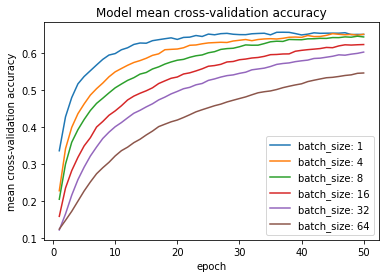

In [ ]:
question2.cross_validate_plot_results()

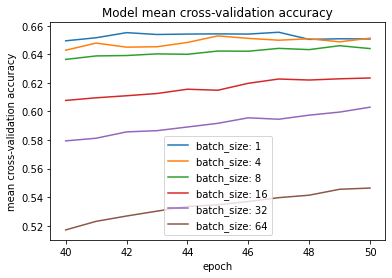

In [ ]:
question2.cross_validate_plot_results(epoch_start=40)

In [ ]:
print("\n".join("{}\t{}".format(k, v["epoch: {}".format(question2.epochs - 1)]) for k, v in
                mean_of_experiment_mean_accuracies.items()))

optimal_batch_size = None
optimal_batch_size_experiment_value = None

for batch_size_key in mean_of_experiment_mean_accuracies.keys():
    epoch_key = "epoch: {}".format(question2.epochs - 1)
    if not optimal_batch_size_experiment_value or mean_of_experiment_mean_accuracies[batch_size_key][
        epoch_key] > optimal_batch_size_experiment_value:
        optimal_batch_size_experiment_value = mean_of_experiment_mean_accuracies[batch_size_key][epoch_key]
        optimal_batch_size = int(batch_size_key.split(": ")[-1])

batch_size: 1	0.6507868409156798
batch_size: 4	0.6513590852419535
batch_size: 8	0.6440629442532857
batch_size: 16	0.6234620928764343
batch_size: 32	0.6030042906602223
batch_size: 64	0.5463519304990768


b) Create a table of median time taken to train the network for one epoch against different batch sizes. (Hint: Introduce a callback)

In [ ]:
experiment_median_times = question2.get_experiment_median_times()
print("\n".join("{}\t{}".format(k, v) for k, v in experiment_median_times.items()))

batch_size: 1	0.764892578125
batch_size: 4	0.19536209106445312
batch_size: 8	0.13433635234832764
batch_size: 16	0.0662766695022583
batch_size: 32	0.04663848876953125
batch_size: 64	0.02917182445526123


c) Select the optimal batch size and state reasons for your selection.

d) What is the difference between mini-batch gradient descent and stochastic gradient descent and what does this mean for model training?

e) Plot the train and test accuracies against epochs for the optimal batch size. 

In [ ]:
print(optimal_batch_size)

4


In [ ]:
question2.create_model()
question2.train_model(batch_size=optimal_batch_size)

Epoch 1/50
175/175 [==============================] - 1s 4ms/step - loss: 2.3759 - accuracy: 0.1700 - val_loss: 2.0248 - val_accuracy: 0.2633
Epoch 2/50
175/175 [==============================] - 0s 2ms/step - loss: 1.9618 - accuracy: 0.2914 - val_loss: 1.7929 - val_accuracy: 0.3767
Epoch 3/50
175/175 [==============================] - 0s 2ms/step - loss: 1.7680 - accuracy: 0.3586 - val_loss: 1.6461 - val_accuracy: 0.4300
Epoch 4/50
175/175 [==============================] - 0s 2ms/step - loss: 1.5935 - accuracy: 0.4386 - val_loss: 1.5382 - val_accuracy: 0.4567
Epoch 5/50
175/175 [==============================] - 0s 2ms/step - loss: 1.5162 - accuracy: 0.4786 - val_loss: 1.4608 - val_accuracy: 0.4767
Epoch 6/50
175/175 [==============================] - 0s 2ms/step - loss: 1.4178 - accuracy: 0.4986 - val_loss: 1.4105 - val_accuracy: 0.4967
Epoch 7/50
175/175 [==============================] - 0s 2ms/step - loss: 1.3923 - accuracy: 0.5214 - val_loss: 1.3600 - val_accuracy: 0.5100
Epoch 

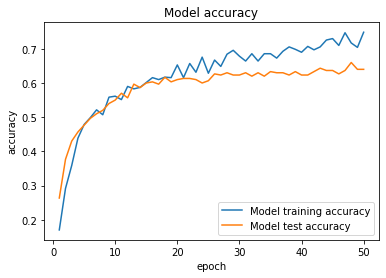

In [ ]:
question2.plot_model("accuracy")

# Question 3
Find the optimal number of hidden neurons for the 2-layer network (i.e., one hidden layer) designed in Question 1 and 2.

In [ ]:
class Question3():

    def __init__(self, X_train, y_train, X_test, y_test, epochs=50, num_hidden_neurons=16, batch_size=1,
                 num_experiments=10):
        self.epochs = epochs
        self.num_hidden_neurons = num_hidden_neurons
        self.batch_size = batch_size
        self.num_experiments = num_experiments
        self.num_hidden_neurons_list = [8, 16, 32, 64]
        self.num_folds = 3
        self.seed = 0
        self.history = None

        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test

        np.random.seed(self.seed)
        tf.random.set_seed(self.seed)

    def create_model(self, num_hidden_neurons=None):
        # create the model
        num_hidden_neurons = num_hidden_neurons or self.num_hidden_neurons
        self.model = tf.keras.Sequential([
            tf.keras.layers.Dense(units=num_hidden_neurons, activation="relu"),
            tf.keras.layers.Dropout(rate=0.3, seed=self.seed),
            tf.keras.layers.Dense(units=10, activation="softmax")
        ])

        self.model.compile(optimizer="adam",
                           loss="sparse_categorical_crossentropy",
                           metrics=["accuracy"])

    def cross_validate_run_experiment(self, experiment_X_train, experiment_y_train):
        size_fold = len(experiment_X_train) // self.num_folds
        # experiment_accuracy maps num_hidden_neurons_key -> num_fold_key -> epoch_key -> val_accuracy
        experiment_accuracy = {}

        for num_fold in range(self.num_folds):
            start, end = num_fold * size_fold, (num_fold + 1) * size_fold
            cv_X_train = np.append(experiment_X_train[:start], experiment_X_train[end:], axis=0)
            cv_y_train = np.append(experiment_y_train[:start], experiment_y_train[end:], axis=0)
            cv_X_test, cv_y_test = experiment_X_train[start:end], experiment_y_train[start:end]

            for num_hidden_neurons in self.num_hidden_neurons_list:

                cv_model = tf.keras.Sequential([
                    tf.keras.layers.Dense(units=self.num_hidden_neurons, activation="relu"),
                    tf.keras.layers.Dropout(rate=0.3, seed=self.seed),
                    tf.keras.layers.Dense(units=10, activation="softmax")
                ])

                cv_model.compile(optimizer="adam",
                                 loss="sparse_categorical_crossentropy",
                                 metrics=["accuracy"])

                cv_history = cv_model.fit(x=cv_X_train, y=cv_y_train,
                                          batch_size=self.batch_size,
                                          epochs=self.epochs,
                                          verbose=0,
                                          validation_data=(cv_X_test, cv_y_test))

                num_hidden_neurons_key = "num_hidden_neurons: {}".format(num_hidden_neurons)
                num_fold_key = "num_fold: {}".format(num_fold)

                # populate experiment_result
                if not experiment_accuracy.get(num_hidden_neurons_key):
                    experiment_accuracy[num_hidden_neurons_key] = {}
                if not experiment_accuracy[num_hidden_neurons_key].get(num_fold_key):
                    experiment_accuracy[num_hidden_neurons_key][num_fold_key] = {}

                for epoch, val_accuracy in enumerate(cv_history.history["val_accuracy"]):
                    epoch_key = "epoch: {}".format(epoch)
                    experiment_accuracy[num_hidden_neurons_key][num_fold_key][epoch_key] = val_accuracy

        return experiment_accuracy

    def cross_validate_model(self):
        size_X_train = len(self.X_train)
        index = np.arange(size_X_train)
        # experiment_accuracies maps experiment_key -> num_hidden_neurons_key -> num_fold_key -> epoch_key -> val_accuracy
        experiment_accuracies = {}

        for experiment in range(self.num_experiments):
            np.random.shuffle(index)
            experiment_X_train, experiment_y_train = self.X_train[index], self.y_train[index]
            experiment_accuracy = self.cross_validate_run_experiment(experiment_X_train, experiment_y_train)
            experiment_key = "experiment: {}".format(experiment)
            experiment_accuracies[experiment_key] = experiment_accuracy

        experiment_mean_accuracies = self.cross_validate_get_experiment_mean_accuracies(experiment_accuracies)
        self.mean_of_experiment_mean_accuracies = self.cross_validate_get_mean_of_experiment_mean_accuracies(
            experiment_mean_accuracies)

    def get_mean_of_experiment_mean_accuracies(self):
        return self.mean_of_experiment_mean_accuracies

    @staticmethod
    def cross_validate_get_experiment_mean_accuracies(experiment_accuracies):
        # experiment_mean_accuracies maps experiment_key -> num_hidden_neurons_key -> epoch -> mean_val_accuracy
        experiment_mean_accuracies = {}

        for experiment_key in experiment_accuracies.keys():
            # experiment_accuracy maps num_hidden_neurons_key -> num_fold_key -> epoch_key -> val_accuracy
            experiment_accuracy = experiment_accuracies[experiment_key]
            # experiment_mean_accuracy maps num_hidden_neurons_key -> epoch_key -> mean_val_accuracy
            experiment_mean_accuracy = {}

            for num_hidden_neurons_key in experiment_accuracy.keys():
                if not experiment_mean_accuracy.get(num_hidden_neurons_key):
                    experiment_mean_accuracy[num_hidden_neurons_key] = {}
                for num_fold_key in experiment_accuracy[num_hidden_neurons_key].keys():
                    for epoch_key, val_accuracy in experiment_accuracy[num_hidden_neurons_key][num_fold_key].items():
                        if not experiment_mean_accuracy[num_hidden_neurons_key].get(epoch_key):
                            experiment_mean_accuracy[num_hidden_neurons_key][epoch_key] = []
                        experiment_mean_accuracy[num_hidden_neurons_key][epoch_key].append(val_accuracy)

            for num_hidden_neurons_key in experiment_mean_accuracy.keys():
                for epoch_key in experiment_mean_accuracy[num_hidden_neurons_key].keys():
                    experiment_mean_accuracy[num_hidden_neurons_key][epoch_key] = np.mean(
                        experiment_mean_accuracy[num_hidden_neurons_key][epoch_key])

            experiment_mean_accuracies[experiment_key] = experiment_mean_accuracy

        return experiment_mean_accuracies

    @staticmethod
    def cross_validate_get_mean_of_experiment_mean_accuracies(experiment_mean_accuracies):
        # mean_of_experiment_mean_accuracies maps num_hidden_neurons_key -> epoch -> mean_of_mean_val_accuracy
        mean_of_experiment_mean_accuracies = {}

        for experiment_key in experiment_mean_accuracies.keys():
            # experiment_mean_accuracy maps num_hidden_neurons_key -> epoch_key -> mean_val_accuracy
            experiment_mean_accuracy = experiment_mean_accuracies[experiment_key]

            for num_hidden_neurons_key in experiment_mean_accuracy.keys():
                if not mean_of_experiment_mean_accuracies.get(num_hidden_neurons_key):
                    mean_of_experiment_mean_accuracies[num_hidden_neurons_key] = {}
                for epoch_key, mean_val_accuracy in experiment_mean_accuracy[num_hidden_neurons_key].items():
                    if not mean_of_experiment_mean_accuracies[num_hidden_neurons_key].get(epoch_key):
                        mean_of_experiment_mean_accuracies[num_hidden_neurons_key][epoch_key] = []
                    mean_of_experiment_mean_accuracies[num_hidden_neurons_key][epoch_key].append(mean_val_accuracy)

        for num_hidden_neurons_key in mean_of_experiment_mean_accuracies.keys():
            for epoch_key in experiment_mean_accuracy[num_hidden_neurons_key].keys():
                mean_of_experiment_mean_accuracies[num_hidden_neurons_key][epoch_key] = np.mean(
                    mean_of_experiment_mean_accuracies[num_hidden_neurons_key][epoch_key])

        return mean_of_experiment_mean_accuracies

    def summarize_model(self):
        # summarize the model
        print(self.model.summary())

    def train_model(self, batch_size=None):
        # train the model
        batch_size = batch_size or self.batch_size
        self.history = self.model.fit(x=self.X_train, y=self.y_train,
                                      batch_size=batch_size,
                                      epochs=self.epochs,
                                      verbose=1,
                                      validation_data=(self.X_test, self.y_test))

    def plot_model(self, variable="loss", epoch_start=1, epoch_end=None):
        # plot learning curves
        train_epochs = self.history.history[variable][epoch_start - 1:epoch_end]
        val_epochs = self.history.history["val_{}".format(variable)][epoch_start - 1:epoch_end]
        number_epochs = len(self.history.history[variable][epoch_start - 1:epoch_end])

        plt.plot(range(epoch_start, epoch_start + number_epochs), train_epochs,
                 label="Model training {}".format(variable))
        plt.plot(range(epoch_start, epoch_start + number_epochs), val_epochs, label="Model test {}".format(variable))
        plt.title("Model {}".format(variable))
        plt.ylabel("{}".format(variable))
        plt.xlabel("epoch")
        plt.legend(loc="best")
        plt.show()
    
    def cross_validate_plot_results(self, epoch_start=1, epoch_end=None):
        for num_hidden_neurons_key in self.mean_of_experiment_mean_accuracies.keys():
            val_epochs = [self.mean_of_experiment_mean_accuracies[num_hidden_neurons_key]["epoch: {}".format(epoch)] for epoch
                          in range(self.epochs)][epoch_start-1:epoch_end]
            number_epochs = len(val_epochs)
            plt.plot(range(epoch_start, epoch_start + number_epochs), val_epochs, label=num_hidden_neurons_key)

        plt.title("Model mean cross-validation accuracy")
        plt.ylabel("mean cross-validation accuracy")
        plt.xlabel("epoch")
        plt.legend(loc="best")
        plt.show()

a) Plot the cross-validation accuracies against training epochs for different numbers of hidden-layer neurons. Limit the search space of the number of neurons to {8, 16, 32, 64}. Continue using 3-fold cross validation on training dataset.

In [ ]:
print(optimal_batch_size)

4


In [ ]:
question3 = Question3(X_train, y_train, X_test, y_test, batch_size=optimal_batch_size)
question3.cross_validate_model()
mean_of_experiment_mean_accuracies = question3.get_mean_of_experiment_mean_accuracies()

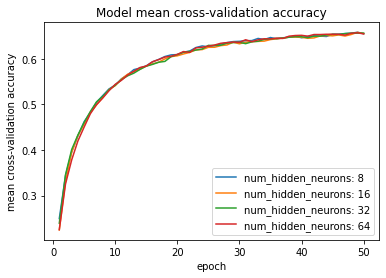

In [ ]:
question3.cross_validate_plot_results()

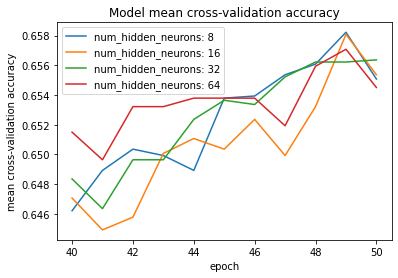

In [ ]:
question3.cross_validate_plot_results(epoch_start=40)

In [ ]:
print("\n".join("{}\t{}".format(k, v["epoch: {}".format(question3.epochs - 1)]) for k, v in
                mean_of_experiment_mean_accuracies.items()))

optimal_num_hidden_neurons = None
optimal_num_hidden_neurons_experiment_value = None

for num_hidden_neurons_key in mean_of_experiment_mean_accuracies.keys():
    epoch_key = "epoch: {}".format(question3.epochs - 1)
    if not optimal_num_hidden_neurons_experiment_value or mean_of_experiment_mean_accuracies[num_hidden_neurons_key][
        epoch_key] > optimal_num_hidden_neurons_experiment_value:
        optimal_num_hidden_neurons_experiment_value = mean_of_experiment_mean_accuracies[num_hidden_neurons_key][
            epoch_key]
        optimal_num_hidden_neurons = int(num_hidden_neurons_key.split(": ")[-1])

num_hidden_neurons: 8	0.6550786813100178
num_hidden_neurons: 16	0.6553648054599761
num_hidden_neurons: 32	0.6563662350177765
num_hidden_neurons: 64	0.6545064409573873


b) Select the optimal number of neurons for the hidden layer. State the rationale for your selection.

c) Plot the train and test accuracies against training epochs with the optimal number of neurons.

In [ ]:
print(optimal_num_hidden_neurons)

32


In [ ]:
question3.create_model(num_hidden_neurons=optimal_num_hidden_neurons)
question3.train_model()

Epoch 1/50
175/175 [==============================] - 1s 3ms/step - loss: 2.3286 - accuracy: 0.2100 - val_loss: 1.7963 - val_accuracy: 0.3467
Epoch 2/50
175/175 [==============================] - 0s 2ms/step - loss: 1.7454 - accuracy: 0.3900 - val_loss: 1.5241 - val_accuracy: 0.4767
Epoch 3/50
175/175 [==============================] - 0s 2ms/step - loss: 1.5161 - accuracy: 0.4614 - val_loss: 1.3843 - val_accuracy: 0.5100
Epoch 4/50
175/175 [==============================] - 0s 2ms/step - loss: 1.3791 - accuracy: 0.5343 - val_loss: 1.3135 - val_accuracy: 0.5200
Epoch 5/50
175/175 [==============================] - 0s 2ms/step - loss: 1.2728 - accuracy: 0.5371 - val_loss: 1.2330 - val_accuracy: 0.5433
Epoch 6/50
175/175 [==============================] - 0s 2ms/step - loss: 1.1479 - accuracy: 0.5886 - val_loss: 1.1904 - val_accuracy: 0.5833
Epoch 7/50
175/175 [==============================] - 0s 2ms/step - loss: 1.0972 - accuracy: 0.6043 - val_loss: 1.1483 - val_accuracy: 0.5800
Epoch 

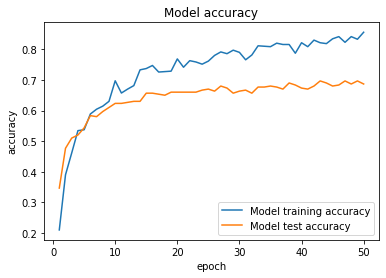

In [ ]:
question3.plot_model("accuracy")

d) What other parameters could possibly be tuned?

# Question 4
After you are done with the 2-layer network, design a 3-layer network with two hiddenlayers with ReLU activation, each consisting of the optimal number of neurons you obtained in Question 3, (apply a dropout with a probability of 0.3 for each hidden layer), and train it with a batch size of 1.

In [ ]:
class Question4():

    def __init__(self, X_train, y_train, X_test, y_test, epochs=50, num_hidden_neurons=16, batch_size=1):
        self.epochs = epochs
        self.num_hidden_neurons = num_hidden_neurons
        self.batch_size = batch_size
        self.seed = 0
        self.history = None

        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test

        np.random.seed(self.seed)
        tf.random.set_seed(self.seed)

    def create_model(self, num_hidden_neurons=None):
        # create the model
        num_hidden_neurons = num_hidden_neurons or self.num_hidden_neurons
        self.model = tf.keras.Sequential([
            tf.keras.layers.Dense(units=num_hidden_neurons, activation="relu"),
            tf.keras.layers.Dropout(rate=0.3, seed=self.seed),
            tf.keras.layers.Dense(units=num_hidden_neurons, activation="relu"),
            tf.keras.layers.Dropout(rate=0.3, seed=self.seed),
            tf.keras.layers.Dense(units=10, activation="softmax")
        ])

        self.model.compile(optimizer="adam",
                           loss="sparse_categorical_crossentropy",
                           metrics=["accuracy"])

    def summarize_model(self):
        # summarize the model
        print(self.model.summary())

    def train_model(self, batch_size=None):
        # train the model
        batch_size = batch_size or self.batch_size
        self.history = self.model.fit(x=self.X_train, y=self.y_train,
                                      batch_size=batch_size,
                                      epochs=self.epochs,
                                      verbose=1,
                                      validation_data=(self.X_test, self.y_test))

    def plot_model(self, variable="loss", epoch_start=1, epoch_end=None):
        # plot learning curves
        train_epochs = self.history.history[variable][epoch_start - 1:epoch_end]
        val_epochs = self.history.history["val_{}".format(variable)][epoch_start - 1:epoch_end]
        number_epochs = len(self.history.history[variable][epoch_start - 1:epoch_end])

        plt.plot(range(epoch_start, epoch_start + number_epochs), train_epochs,
                 label="Model training {}".format(variable))
        plt.plot(range(epoch_start, epoch_start + number_epochs), val_epochs, label="Model test {}".format(variable))
        plt.title("Model {}".format(variable))
        plt.ylabel("{}".format(variable))
        plt.xlabel("epoch")
        plt.legend(loc="best")
        plt.show()

a) Plot the train and test accuracy of the 3-layer network against training epochs.

In [ ]:
print(optimal_num_hidden_neurons)

32


In [ ]:
question4 = Question4(X_train, y_train, X_test, y_test, num_hidden_neurons=optimal_num_hidden_neurons)
question4.create_model()
question4.train_model()

Epoch 1/50
700/700 [==============================] - 2s 2ms/step - loss: 2.1023 - accuracy: 0.2129 - val_loss: 1.7059 - val_accuracy: 0.3767
Epoch 2/50
700/700 [==============================] - 1s 2ms/step - loss: 1.7136 - accuracy: 0.3786 - val_loss: 1.5177 - val_accuracy: 0.4667
Epoch 3/50
700/700 [==============================] - 1s 2ms/step - loss: 1.5059 - accuracy: 0.4471 - val_loss: 1.3868 - val_accuracy: 0.4933
Epoch 4/50
700/700 [==============================] - 1s 2ms/step - loss: 1.3777 - accuracy: 0.4986 - val_loss: 1.2750 - val_accuracy: 0.5467
Epoch 5/50
700/700 [==============================] - 1s 2ms/step - loss: 1.2612 - accuracy: 0.5443 - val_loss: 1.1919 - val_accuracy: 0.5700
Epoch 6/50
700/700 [==============================] - 1s 2ms/step - loss: 1.2547 - accuracy: 0.5243 - val_loss: 1.1775 - val_accuracy: 0.5533
Epoch 7/50
700/700 [==============================] - 1s 2ms/step - loss: 1.1732 - accuracy: 0.5643 - val_loss: 1.1290 - val_accuracy: 0.5833
Epoch 

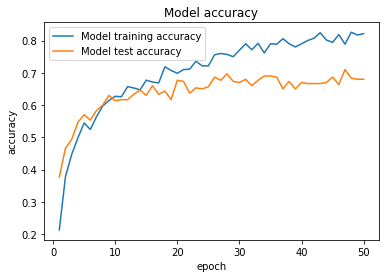

In [ ]:
question4.plot_model("accuracy")

b) Compare and comment on the performances of the optimal 2-layer network from your hyperparameter tuning in Question 2 and 3 and the 3-layer network.

# Question 5 (let’s dig deeper!)
We are going to dissect the purpose of dropout in the model.

In [ ]:
class Question5():

    def __init__(self, X_train, y_train, X_test, y_test, epochs=50, num_hidden_neurons=16, batch_size=1):
        self.epochs = epochs
        self.num_hidden_neurons = num_hidden_neurons
        self.batch_size = batch_size
        self.seed = 0
        self.history = None

        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test

        np.random.seed(self.seed)
        tf.random.set_seed(self.seed)

    def create_model(self):
        # create the model
        self.model = tf.keras.Sequential([
            tf.keras.layers.Dense(units=self.num_hidden_neurons, activation="relu"),
            tf.keras.layers.Dense(units=10, activation="softmax")
        ])

        self.model.compile(optimizer="adam",
                           loss="sparse_categorical_crossentropy",
                           metrics=["accuracy"])

    def summarize_model(self):
        # summarize the model
        print(self.model.summary())

    def train_model(self, batch_size=None):
        # train the model
        batch_size = batch_size or self.batch_size
        self.history = self.model.fit(x=self.X_train, y=self.y_train,
                                      batch_size=batch_size,
                                      epochs=self.epochs,
                                      verbose=1,
                                      validation_data=(self.X_test, self.y_test))

    def plot_model(self, variable="loss", epoch_start=1, epoch_end=None):
        # plot learning curves
        train_epochs = self.history.history[variable][epoch_start - 1:epoch_end]
        val_epochs = self.history.history["val_{}".format(variable)][epoch_start - 1:epoch_end]
        number_epochs = len(self.history.history[variable][epoch_start - 1:epoch_end])

        plt.plot(range(epoch_start, epoch_start + number_epochs), train_epochs,
                 label="Model training {}".format(variable))
        plt.plot(range(epoch_start, epoch_start + number_epochs), val_epochs, label="Model test {}".format(variable))
        plt.title("Model {}".format(variable))
        plt.ylabel("{}".format(variable))
        plt.xlabel("epoch")
        plt.legend(loc="best")
        plt.show()

a) Why do we add dropouts? Investigate the purpose of dropouts by removing dropouts from your original 2-layer network (before changing the batch size and number of neurons). Plot accuracies on training and test data with neural network without dropout. Plot as well the losses on training and test data with neural network without dropout.

In [ ]:
question5 = Question5(X_train, y_train, X_test, y_test)
question5.create_model()
question5.train_model()

Epoch 1/50
700/700 [==============================] - 2s 2ms/step - loss: 1.9032 - accuracy: 0.3486 - val_loss: 1.7267 - val_accuracy: 0.4000
Epoch 2/50
700/700 [==============================] - 1s 2ms/step - loss: 1.3812 - accuracy: 0.5100 - val_loss: 1.4706 - val_accuracy: 0.4633
Epoch 3/50
700/700 [==============================] - 1s 2ms/step - loss: 1.1575 - accuracy: 0.5914 - val_loss: 1.3331 - val_accuracy: 0.5300
Epoch 4/50
700/700 [==============================] - 1s 2ms/step - loss: 1.0151 - accuracy: 0.6443 - val_loss: 1.2124 - val_accuracy: 0.5867
Epoch 5/50
700/700 [==============================] - 1s 2ms/step - loss: 0.8969 - accuracy: 0.6929 - val_loss: 1.1638 - val_accuracy: 0.6133
Epoch 6/50
700/700 [==============================] - 1s 2ms/step - loss: 0.8170 - accuracy: 0.7171 - val_loss: 1.1349 - val_accuracy: 0.6167
Epoch 7/50
700/700 [==============================] - 1s 2ms/step - loss: 0.7461 - accuracy: 0.7457 - val_loss: 1.0945 - val_accuracy: 0.6300
Epoch 

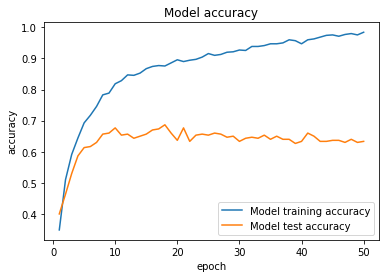

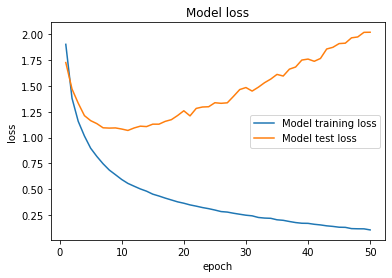

In [ ]:
question5.plot_model("accuracy")
question5.plot_model("loss")

b) Explain the effect of removing dropouts.

c) What is another approach that you could take to address overfitting in the model?